In [6]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder
import imageio
imageio.plugins.ffmpeg.download()

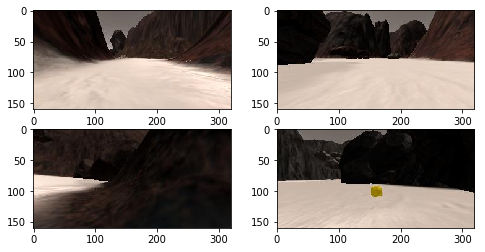

In [20]:
path = '../test_dataset/IMG2/*'
img_list = glob.glob(path)

# Grab 3 images randomly and display 
idx = np.random.randint(0, len(img_list)-1)
image1 = mpimg.imread(img_list[idx])
idx = np.random.randint(0, len(img_list)-1)
image2 = mpimg.imread(img_list[idx])
idx = np.random.randint(0, len(img_list)-1)
image3 = mpimg.imread(img_list[idx])

rock = '../calibration_images/example_rock1.jpg'
rock = mpimg.imread(rock)

fig = plt.figure(figsize=(8,4))
plt.subplot(221)
plt.imshow(image1)
plt.subplot(222)
plt.imshow(image2)
plt.subplot(223)
plt.imshow(image3)
plt.subplot(224)
plt.imshow(rock)

# let's use the coloring to extract the navigable terrain

In [8]:
def color_thresh(img,thresh=(0,0,0)):
    """This function returns a matrix with the same shape as
    the image but with pixels 0 or 1 depending on whether they're
    above your specified threshold or not. 
    """
    
    binary_output = np.zeros_like(img[:,:,0])
    
    above_thresh = (img[:,:,0] > thresh[0]) \
                & (img[:,:,1] > thresh[1]) \
                & (img[:,:,2] > thresh[2])
    
    binary_output[above_thresh] = 1
    
    return binary_output

## we can plot RGB values to see if there's any clear cut offs

In [22]:
r = image1[:,:,0]
g = image1[:,:,1]
b = image1[:,:,2]

array([[ 23,  23,  23, ...,  22,  26,  28],
       [ 23,  22,  22, ...,  25,  29,  32],
       [ 22,  22,  22, ...,  30,  34,  39],
       ...,
       [215, 214, 214, ..., 255, 254, 253],
       [216, 216, 216, ..., 250, 249, 249],
       [217, 217, 217, ..., 244, 245, 245]], dtype=uint8)